In [1]:
import sys
import os

import numpy as np
import matplotlib.pyplot as plt

# import the path of the project
sys.path.append(os.path.abspath("src"))

from utils.logger import CommLogger

#auto reload modules
%reload_ext autoreload
%autoreload 2

In [2]:
dataset_list = ['covtype', 'msd', 'gisette', 'realsim', 'epsilon', 'letter', 'radar']

In [21]:
# Generated by the statistic script, after monitoring the NIC we got the following results
# The unit is MB
data = {
"covtype_cvfl": {"rx_mean": 38699.83, "tx_mean": 10506.84, "rx_std": 0.00, "tx_std": 0.00},
"covtype_fedtree": {"rx_mean": 1419.77, "tx_mean": 11624.84, "rx_std": 0.00, "tx_std": 0.00},
"covtype_gal": {"rx_mean": 2651.59, "tx_mean": 2125.32, "rx_std": 0.00, "tx_std": 0.00},
"covtype_splitnn": {"rx_mean": 34938.38, "tx_mean": 432.90, "rx_std": 0.56, "tx_std": 8.93},
"epsilon_cvfl": {"rx_mean": 25459.04, "tx_mean": 7109.87, "rx_std": 0.00, "tx_std": 0.00},
"epsilon_fedtree": {"rx_mean": 2706.84, "tx_mean": 2373.50, "rx_std": 0.00, "tx_std": 0.00},
"epsilon_gal": {"rx_mean": 844.38, "tx_mean": 844.54, "rx_std": 0.00, "tx_std": 0.00},
"epsilon_splitnn": {"rx_mean": 24201.88, "tx_mean": 332.25, "rx_std": 0.39, "tx_std": 8.23},
"gisette_cvfl": {"rx_mean": 525.82, "tx_mean": 140.00, "rx_std": 0.00, "tx_std": 0.00},
"gisette_fedtree": {"rx_mean": 6049.92, "tx_mean": 44.00, "rx_std": 0.01, "tx_std": 0.03},
"gisette_gal": {"rx_mean": 53.36, "tx_mean": 31.61, "rx_std": 0.00, "tx_std": 0.00},
"gisette_splitnn": {"rx_mean": 401.75, "tx_mean": 28.25, "rx_std": 0.38, "tx_std": 0.59},
"letter_cvfl": {"rx_mean": 1078.81, "tx_mean": 559.91, "rx_std": 0.00, "tx_std": 0.00},
"letter_fedtree": {"rx_mean": 569.52, "tx_mean": 986.83, "rx_std": 0.00, "tx_std": 0.00},
"letter_gal": {"rx_mean": 1008.41, "tx_mean": 215.57, "rx_std": 0.00, "tx_std": 0.00},
"letter_splitnn": {"rx_mean": 937.14, "tx_mean": 33.46, "rx_std": 0.21, "tx_std": 0.58},
"msd_cvfl": {"rx_mean": 29031.89, "tx_mean": 7575.59, "rx_std": 0.00, "tx_std": 0.00},
"msd_fedtree": {"rx_mean": 405.96, "tx_mean": 1330.31, "rx_std": 0.00, "tx_std": 0.00},
"msd_gal": {"rx_mean": 329.23, "tx_mean": 215.37, "rx_std": 0.00, "tx_std": 0.00},
"msd_splitnn": {"rx_mean": 27896.21, "tx_mean": 346.86, "rx_std": 2.57, "tx_std": 5.91},
"radar_cvfl": {"rx_mean": 20275.09, "tx_mean": 5380.46, "rx_std": 0.00, "tx_std": 0.00},
"radar_fedtree": {"rx_mean": 3091.54, "tx_mean": 6502.35, "rx_std": 0.00, "tx_std": 0.00},
"radar_gal": {"rx_mean": 1422.04, "tx_mean": 944.82, "rx_std": 0.00, "tx_std": 0.00},
"radar_splitnn": {"rx_mean": 19636.84, "tx_mean": 256.92, "rx_std": 35.92, "tx_std": 17.93},
"realsim_cvfl": {"rx_mean": 5154.64, "tx_mean": 1511.52, "rx_std": 0.00, "tx_std": 0.00},
"realsim_fedtree": {"rx_mean": 20713.81, "tx_mean": 284.38, "rx_std": 0.00, "tx_std": 0.00},
"realsim_gal": {"rx_mean": 397.05, "tx_mean": 133.26, "rx_std": 0.00, "tx_std": 0.00},
"realsim_splitnn": {"rx_mean": 4646.34, "tx_mean": 119.74, "rx_std": 0.28, "tx_std": 6.32},
}

# Total Communication Size

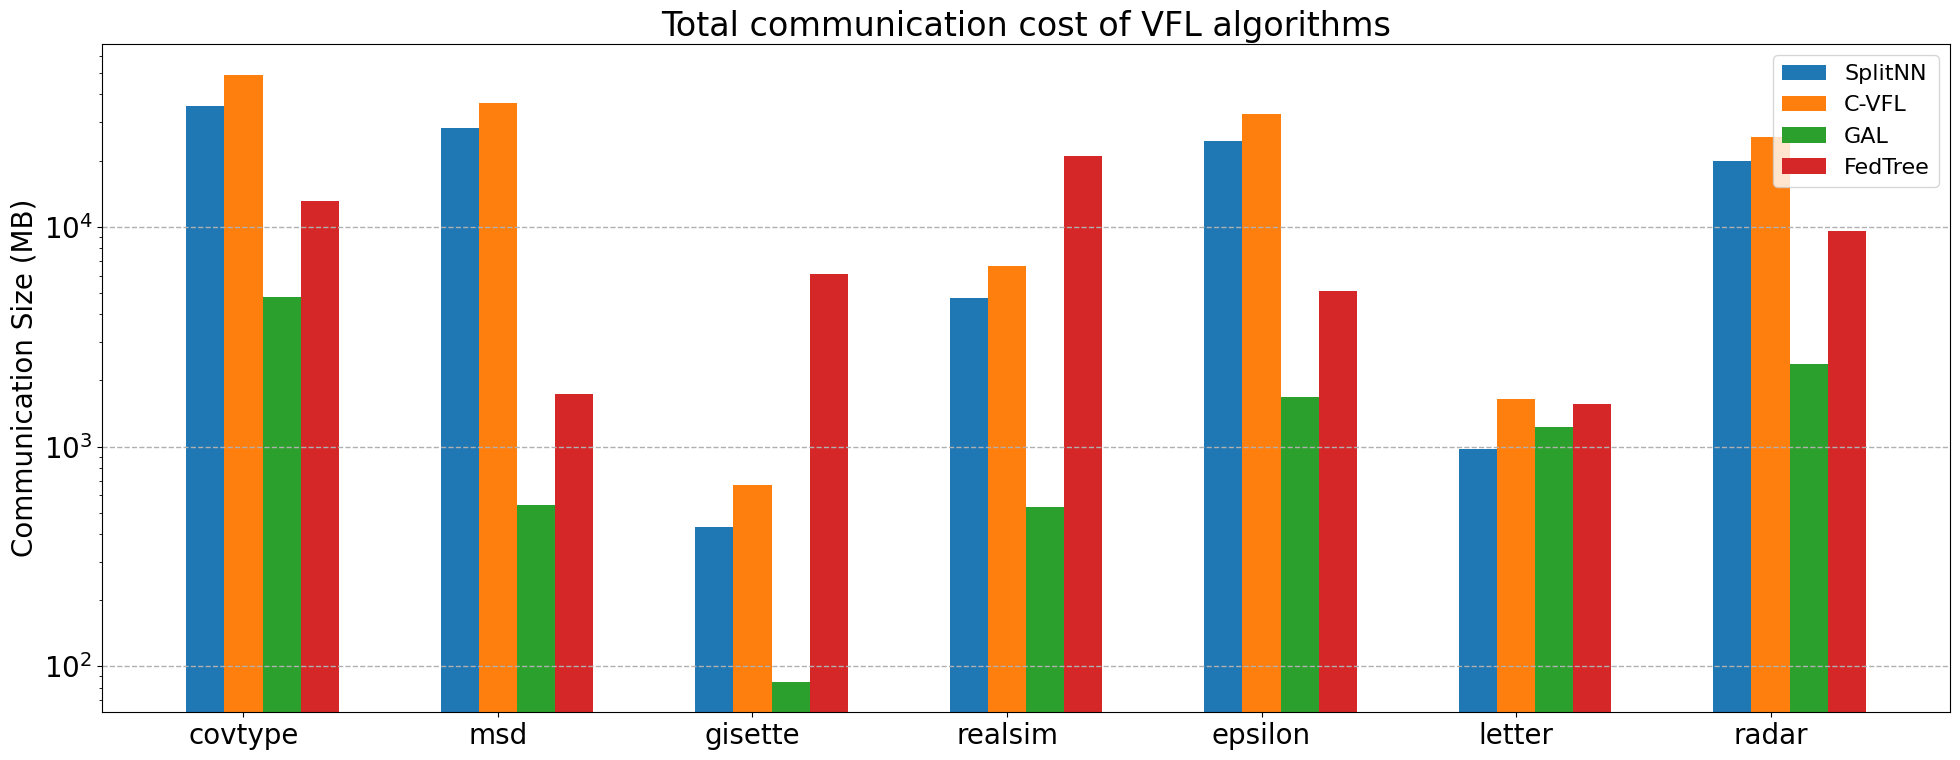

In [22]:
cvfl_comm_max_in_list = [ data[ds + '_cvfl']['rx_mean'] for ds in dataset_list ]
cvfl_comm_max_out_list = [ data[ds + '_cvfl']['tx_mean'] for ds in dataset_list ]
cvfl_comm_total_list = [ data[ds + '_cvfl']['rx_mean'] + data[ds + '_cvfl']['tx_mean'] for ds in dataset_list ]
cvfl_comm_max_in_std_list = [ data[ds + '_cvfl']['rx_std'] for ds in dataset_list ]
cvfl_comm_max_out_std_list = [ data[ds + '_cvfl']['tx_std'] for ds in dataset_list ]

splitnn_comm_max_in_list = [ data[ds + '_splitnn']['rx_mean'] for ds in dataset_list ]
splitnn_comm_max_out_list = [ data[ds + '_splitnn']['tx_mean'] for ds in dataset_list ]
splitnn_comm_total_list = [ data[ds + '_splitnn']['rx_mean'] + data[ds + '_splitnn']['tx_mean'] for ds in dataset_list ]
splitnn_comm_max_in_std_list = [ data[ds + '_splitnn']['rx_std'] for ds in dataset_list ]
splitnn_comm_max_out_std_list = [ data[ds + '_splitnn']['tx_std'] for ds in dataset_list ]

fedtree_comm_max_in_list = [ data[ds + '_fedtree']['rx_mean'] for ds in dataset_list ]
fedtree_comm_max_out_list = [ data[ds + '_fedtree']['tx_mean'] for ds in dataset_list ]
fedtree_comm_total_list = [ data[ds + '_fedtree']['rx_mean'] + data[ds + '_fedtree']['tx_mean'] for ds in dataset_list ]
fedtree_comm_max_in_std_list = [ data[ds + '_fedtree']['rx_std'] for ds in dataset_list ]
fedtree_comm_max_out_std_list = [ data[ds + '_fedtree']['tx_std'] for ds in dataset_list ]

gal_comm_max_in_list = [ data[ds + '_gal']['rx_mean'] for ds in dataset_list ]
gal_comm_max_out_list = [ data[ds + '_gal']['tx_mean'] for ds in dataset_list ]
gal_comm_total_list = [ data[ds + '_gal']['rx_mean'] + data[ds + '_gal']['tx_mean'] for ds in dataset_list ]
gal_comm_max_in_std_list = [ data[ds + '_gal']['rx_std'] for ds in dataset_list ]
gal_comm_max_out_std_list = [ data[ds + '_gal']['tx_std'] for ds in dataset_list ]

# plot the communication cost of each algorithm in a bar chart
algorithm_list = ['SplitNN', 'C-VFL', 'GAL', 'SecureBoost']

plt.rcParams.update({'font.size': 20})
fig, ax = plt.subplots(figsize=(20, 8))
x = np.arange(len(dataset_list))  # the label locations
width = 0.15  # the width of the bars

rects1 = ax.bar(x - width, splitnn_comm_total_list, width, label='SplitNN')
rects2 = ax.bar(x, cvfl_comm_total_list, width, label='C-VFL')
rects3 = ax.bar(x + width, gal_comm_total_list, width, label='GAL')
rects4 = ax.bar(x + 2 * width, fedtree_comm_total_list, width, label='FedTree')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Communication Size (MB)')
ax.set_title('Total communication cost of VFL algorithms')
ax.set_xticks(x)
ax.set_xticklabels(dataset_list)
ax.legend(fontsize=16)
ax.set_yscale('log')
ax.grid(axis='y', linestyle='--', linewidth=1)
    
fig.tight_layout()
fig.savefig('fig/comm_total_real_dist.png')
plt.show()



# Max Incoming (RX)

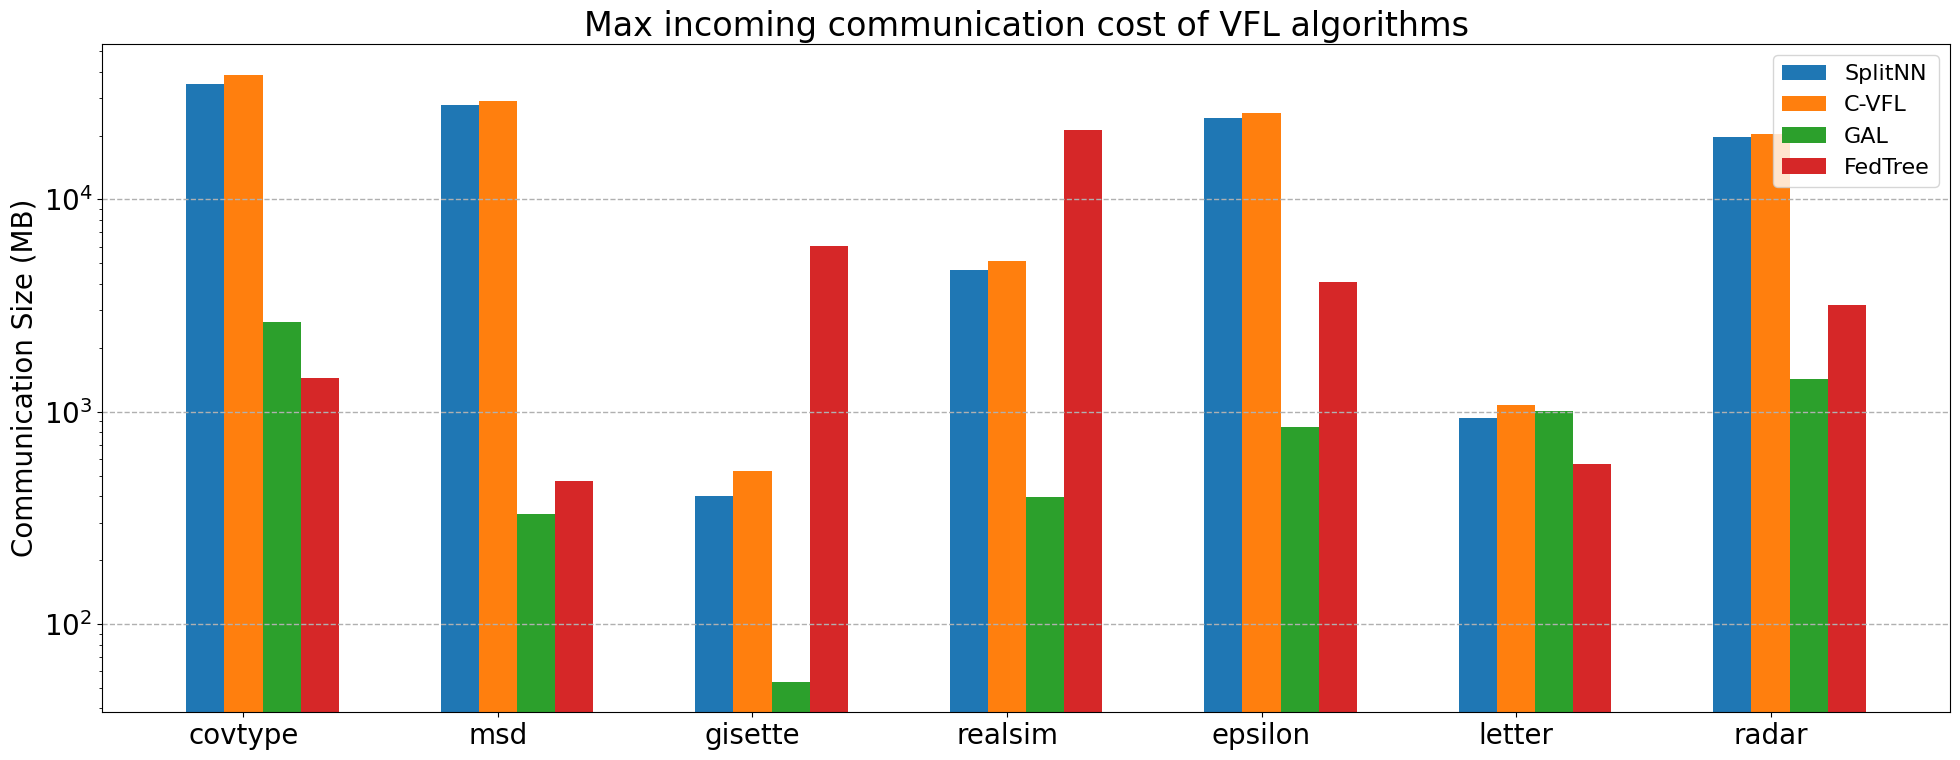

In [19]:
# plot the communication cost of each algorithm in a bar chart
algorithm_list = ['SplitNN', 'C-VFL', 'GAL', 'SecureBoost']

plt.rcParams.update({'font.size': 20})
fig, ax = plt.subplots(figsize=(20, 8))
x = np.arange(len(dataset_list))  # the label locations
width = 0.15  # the width of the bars

rects1 = ax.bar(x - width, splitnn_comm_max_in_list, width, label='SplitNN')
rects2 = ax.bar(x, cvfl_comm_max_in_list, width, label='C-VFL')
rects3 = ax.bar(x + width, gal_comm_max_in_list, width, label='GAL')
rects4 = ax.bar(x + 2 * width, fedtree_comm_max_in_list, width, label='FedTree')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Communication Size (MB)')
ax.set_title('Max incoming communication cost of VFL algorithms')
ax.set_xticks(x)
ax.set_xticklabels(dataset_list)
ax.legend(fontsize=16)
ax.set_yscale('log')
ax.grid(axis='y', linestyle='--', linewidth=1)

fig.tight_layout()
fig.savefig('fig/comm_max_in_real_dist.png')
plt.show()

# Max Outgoing (TX)

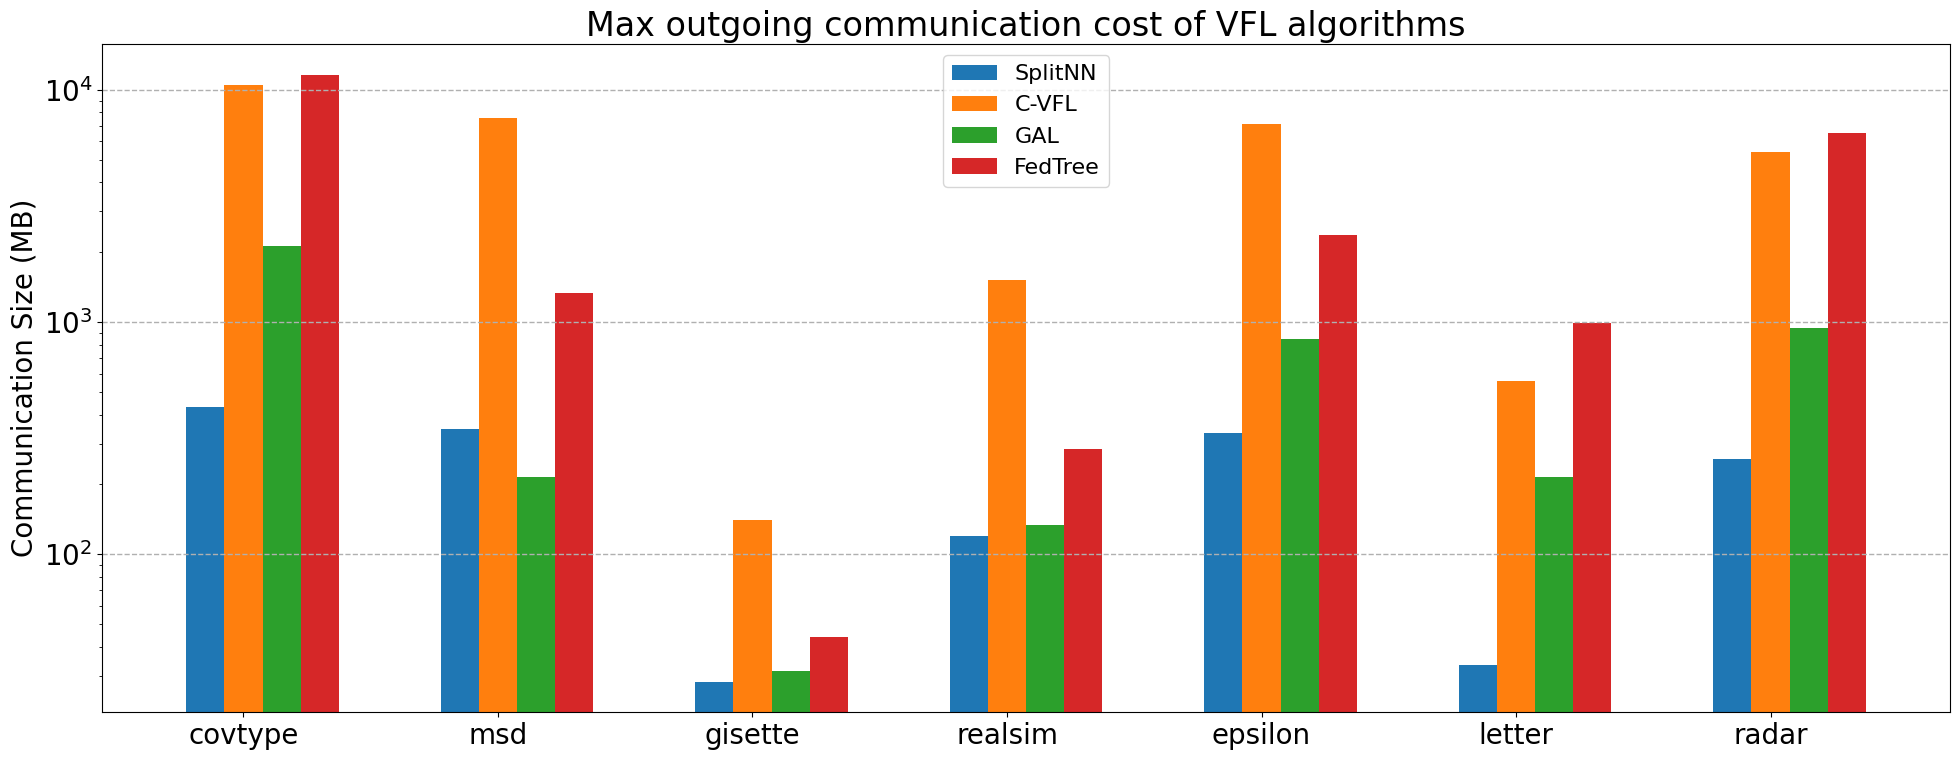

In [20]:
# plot the communication cost of each algorithm in a bar chart
algorithm_list = ['SplitNN', 'C-VFL', 'GAL', 'SecureBoost']

plt.rcParams.update({'font.size': 20})
fig, ax = plt.subplots(figsize=(20, 8))
x = np.arange(len(dataset_list))  # the label locations
width = 0.15  # the width of the bars

rects1 = ax.bar(x - width, splitnn_comm_max_out_list, width, label='SplitNN')
rects2 = ax.bar(x, cvfl_comm_max_out_list, width, label='C-VFL')
rects3 = ax.bar(x + width, gal_comm_max_out_list, width, label='GAL')
rects4 = ax.bar(x + 2 * width, fedtree_comm_max_out_list, width, label='FedTree')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Communication Size (MB)')
ax.set_title('Max outgoing communication cost of VFL algorithms')
ax.set_xticks(x)
ax.set_xticklabels(dataset_list)
ax.legend(fontsize=16)
ax.set_yscale('log')
ax.grid(axis='y', linestyle='--', linewidth=1)
    
fig.tight_layout()
fig.savefig('fig/comm_max_out_real_dist.png')
plt.show()